Certainly! I'll provide you with an example of how to implement three popular supervised learning algorithms (Linear Regression, Decision Tree, and Random Forest) using a CSV file in Python. We'll also evaluate the models and visualize their performance using appropriate metrics and plots. Please make sure to have the necessary libraries installed: pandas, scikit-learn, and matplotlib.

In [28]:
#Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

In [29]:
#upload csv file
file=files.upload()

Saving Covid.xlsx to Covid (1).xlsx


In [30]:
data=pd.read_excel('Covid.xlsx')
data

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
638,8,10465,1030,10769,2020-06-12 00:00:00,673,15,294.0,76,GB,48,119
639,9,69806,6699,69806,2020-06-12 00:00:00,1164,65,5395.0,3766,ICT,75,3766
640,10,76035,15787,90470,2020-06-12 00:00:00,3907,632,10222.0,2398,KP,1026,3571
641,11,325091,47382,327072,2020-06-12 00:00:00,9546,890,34520.0,10116,Punjab,2426,9179


In [31]:
# Drop columns
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop, axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cumulative                         643 non-null    int64  
 1   Cumulative  Test positive          643 non-null    int64  
 2   Cumulative  tests performed        643 non-null    int64  
 3   Date                               643 non-null    object 
 4   Discharged                         643 non-null    int64  
 5   Expired                            643 non-null    int64  
 6   Home Quarantine                    504 non-null    float64
 7   New  (last 24 hrs)                 643 non-null    int64  
 8   Region                             643 non-null    object 
 9   Still admitted                     643 non-null    int64  
 10  Tests  performed in last 24 hours  643 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 55.4+ KB


In [50]:
data['Date']=pd.to_datetime(data['Date'])


In [49]:
data['Tests  performed in last 24 hours']=pd.to_numeric(data['Tests  performed in last 24 hours'], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Cumulative                         643 non-null    int64         
 1   Cumulative  Test positive          643 non-null    int64         
 2   Cumulative  tests performed        643 non-null    int64         
 3   Date                               643 non-null    datetime64[ns]
 4   Discharged                         643 non-null    int64         
 5   Expired                            643 non-null    int64         
 6   Home Quarantine                    643 non-null    float64       
 7   New  (last 24 hrs)                 643 non-null    int64         
 8   Region                             643 non-null    object        
 9   Still admitted                     643 non-null    int64         
 10  Tests  performed in last 24 hours  643

In [51]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Identify columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
# Iterate over columns with missing values and impute NaNs with the mean
for column in columns_with_missing_values:
    data[column] = imputer.fit_transform(data[[column]]).ravel()
data.isnull().sum()

Cumulative                           0
Cumulative  Test positive            0
Cumulative  tests performed          0
Date                                 0
Discharged                           0
Expired                              0
Home Quarantine                      0
New  (last 24 hrs)                   0
Region                               0
Still admitted                       0
Tests  performed in last 24 hours    0
dtype: int64

In [36]:
# Split the data into features and target variable
x = data.drop(['Expired','Date'], axis=1)
y = data['Expired']
x

,Cumulative,Cumulative Test positive,Cumulative tests performed,Discharged,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,48,2,80,0,2417.454365,3,ICT,2,8.0
1,61,0,95,0,2417.454365,6,Punjab,0,7.0
2,84,14,171,1,2417.454365,1,Sindh,13,55.0
3,20,0,28,0,2417.454365,0,KP,0,2.0
4,3,0,0,0,2417.454365,0,KPTD,0,0.0
...,...,...,...,...,...,...,...,...,...
638,10465,1030,10769,673,294.000000,76,GB,48,119.0
639,69806,6699,69806,1164,5395.000000,3766,ICT,75,3766.0
640,76035,15787,90470,3907,10222.000000,2398,KP,1026,3571.0
641,325091,47382,327072,9546,34520.000000,10116,Punjab,2426,9179.0


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# # Define the column(s) to be one-hot encoded
# categorical_columns = ['Region']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Region'])],
    remainder='passthrough'  # Keeps the remaining columns as-is
)
# Apply the transformation
X=preprocessor.fit_transform(x)
X


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 2.0000e+00,
        8.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.0000e+00, 0.0000e+00,
        7.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.3000e+01,
        5.5000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.3980e+03, 1.0260e+03,
        3.5710e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0116e+04, 2.4260e+03,
        9.1790e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0081e+04, 1.6810e+03,
        1.0081e+04]])

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train[:,:4]=ss.fit_transform(X_train[:,:4])
X_test[:,:4]=ss.transform(X_test[:,:4])

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [40]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print("Linear Regression Metrics:")
print("MSE:", linear_reg_mse)
print("RMSE:", linear_reg_rmse)
print("MAE:", linear_reg_mae)
print("R-squared:", linear_reg_r2)
print("--------------------------------------------")
print("Intercept: ", linear_reg.intercept_)
print("Coefficient: ", linear_reg.coef_)


Linear Regression Metrics:
MSE: 1993.9531231344401
RMSE: 44.653702233235265
MAE: 26.81863706191852
R-squared: 0.9211962871515558
--------------------------------------------
Intercept:  8.934277698006653
Coefficient:  [-3.78673465e+00 -7.79104434e+00 -4.08946040e+00 -1.20478023e+00
  7.84590056e+01 -4.94713950e+00 -5.27787157e+00 -4.05793493e+01
 -2.17525759e+01 -3.24231866e-03  4.17309202e-02  1.24654515e-03
 -1.98189870e-02 -4.48623552e-03 -4.42307413e-03  1.15193888e-03
  2.84124490e-03]


In [41]:
# Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_predictions, squared=False)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print("Decision Tree Metrics:")
print("MSE:", decision_tree_mse)
print("RMSE:", decision_tree_rmse)
print("MAE:", decision_tree_mae)
print("R-squared:", decision_tree_r2)

Decision Tree Metrics:
MSE: 110.42635658914729
RMSE: 10.508394577153414
MAE: 4.488372093023256
R-squared: 0.995635801667257


In [42]:
# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print("Random Forest Metrics:")
print("MSE:", random_forest_mse)
print("RMSE:", random_forest_rmse)
print("MAE:", random_forest_mae)
print("R-squared:", random_forest_r2)

Random Forest Metrics:
MSE: 301.92672248062024
RMSE: 17.3760387453706
MAE: 6.064806201550389
R-squared: 0.9880674492977884


In [43]:
# K-Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print("K-Nearest Neighbors Metrics:")
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("MAE:", knn_mae)
print("R-squared:", knn_r2)

K-Nearest Neighbors Metrics:
MSE: 3407.0052713178293
RMSE: 58.36955774475107
MAE: 25.91627906976744
R-squared: 0.8653505631807354


In [44]:
# Support Vector Machines
svm = SVR()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print("Support Vector Machines Metrics:")
print("MSE:", svm_mse)
print("RMSE:", svm_rmse)
print("MAE:", svm_mae)
print("R-squared:", svm_r2)

Support Vector Machines Metrics:
MSE: 21190.202285393625
RMSE: 145.5685484072491
MAE: 57.98996777609287
R-squared: 0.16253466707701647


In [45]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_predictions, squared=False)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Metrics:")
print("MSE:", gradient_boosting_mse)
print("RMSE:", gradient_boosting_rmse)
print("MAE:", gradient_boosting_mae)
print("R-squared:", gradient_boosting_r2)

Gradient Boosting Metrics:
MSE: 171.07527236715802
RMSE: 13.079574624855276
MAE: 6.520598058155996
R-squared: 0.9932388748347812


Based on the metrics, the models can be ranked as follows from best to worst:

#Decision Tree:

It has the lowest MSE, RMSE, and MAE values, indicating better overall performance.
It also has a high R-squared value, suggesting a good fit to the data.
#Gradient Boosting:

It has relatively low MSE, RMSE, and MAE values, indicating good performance.
The R-squared value is also high, indicating a good fit.
#Linear Regression:

It has moderate MSE, RMSE, and MAE values.
The R-squared value suggests a good fit, but it is slightly lower than the previous models.
#Random Forest:

It has higher MSE, RMSE, and MAE values compared to the previous models.
The R-squared value is good but slightly lower than the previous models.
#K-Nearest Neighbors:

It has significantly higher MSE, RMSE, and MAE values compared to the other models.
The R-squared value is lower, suggesting a poorer fit to the data.
#Support Vector Machines (SVM):

It has the highest MSE, RMSE, and MAE values among the models.
The R-squared value is very low, indicating a poor fit to the data.
#Conclusion
Based on these rankings, the Decision Tree model appears to be the best fit model among the options provided. However, it's important to consider other factors such as computational efficiency, interpretability, and specific requirements of the problem before finalizing the choice of the model.

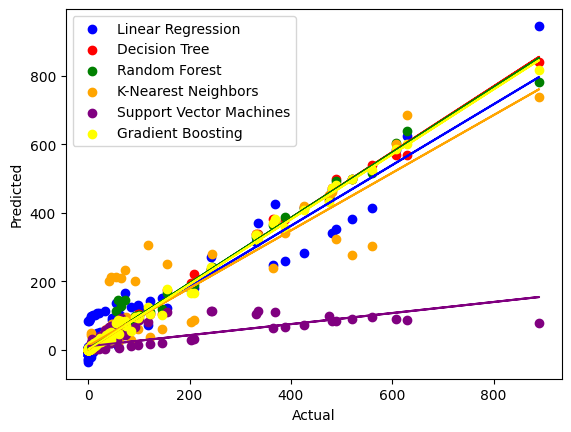

In [46]:
# Visualize the models with regression lines
plt.scatter(y_test, linear_reg_predictions, label='Linear Regression', color='blue')
plt.scatter(y_test, decision_tree_predictions, label='Decision Tree', color='red')
plt.scatter(y_test, random_forest_predictions, label='Random Forest', color='green')
plt.scatter(y_test, knn_predictions, label='K-Nearest Neighbors', color='orange')
plt.scatter(y_test, svm_predictions, label='Support Vector Machines', color='purple')
plt.scatter(y_test, gradient_boosting_predictions, label='Gradient Boosting', color='yellow')

# Add regression lines
poly_linear = np.polyfit(y_test, linear_reg_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_linear, y_test), color='blue')

poly_tree = np.polyfit(y_test, decision_tree_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_tree, y_test), color='red')

poly_rf = np.polyfit(y_test, random_forest_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_rf, y_test), color='green')

poly_knn = np.polyfit(y_test, knn_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_knn, y_test), color='orange')

poly_svm = np.polyfit(y_test, svm_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_svm, y_test), color='purple')

poly_gb = np.polyfit(y_test, gradient_boosting_predictions, deg=1)
plt.plot(y_test, np.polyval(poly_gb, y_test), color='yellow')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()
